In [27]:
### General libraries ###
import pandas as pd
from pandas.api.types import CategoricalDtype
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import graphviz 
from graphviz import Source
from IPython.display import SVG

##################################

### Sklearn ML Models ###
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler


import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from scikeras.wrappers import KerasClassifier
from tensorflow.keras.constraints import MaxNorm

##################################

### Metrics ###
from sklearn import metrics
from sklearn.metrics import f1_score,confusion_matrix, mean_squared_error, mean_absolute_error, classification_report, \
    roc_auc_score, roc_curve, precision_score, recall_score

In [6]:
# Load the data.
data=pd.read_excel('default of credit card clients-1.xlsx', header=1)

# Information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [7]:
# Drop "ID" column.
data=data.drop(['ID'], axis=1)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   LIMIT_BAL                   30000 non-null  int64
 1   SEX                         30000 non-null  int64
 2   EDUCATION                   30000 non-null  int64
 3   MARRIAGE                    30000 non-null  int64
 4   AGE                         30000 non-null  int64
 5   PAY_0                       30000 non-null  int64
 6   PAY_2                       30000 non-null  int64
 7   PAY_3                       30000 non-null  int64
 8   PAY_4                       30000 non-null  int64
 9   PAY_5                       30000 non-null  int64
 10  PAY_6                       30000 non-null  int64
 11  BILL_AMT1                   30000 non-null  int64
 12  BILL_AMT2                   30000 non-null  int64
 13  BILL_AMT3                   30000 non-null  int64
 14  BILL_A

In [9]:
# Check for duplicate rows.
print(f"There are {data.duplicated().sum()} duplicate rows in the data set.")

# Remove duplicate rows.
data=data.drop_duplicates()
print("The duplicate rows were removed.")

There are 35 duplicate rows in the data set.
The duplicate rows were removed.


In [10]:
# Check for null values.
print(f"There are {data.isna().any().sum()} cells with null values in the data set.")

There are 0 cells with null values in the data set.


In [13]:
# Distinguish attribute columns and class column.
X=data[data.columns[:-1]]
data = data.rename(columns={'default payment next month': 'dpnm'})
y=data['dpnm']

In [14]:
# Split to train and test sets. 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=777)

In [15]:
# Standardization
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [16]:
# Initialize a Multi-layer Perceptron classifier.
mlp = MLPClassifier(hidden_layer_sizes=(12,5),max_iter=1000, random_state=777,shuffle=True, verbose=False)

# Train the classifier.
mlp.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(12, 5), max_iter=1000, random_state=25)

In [17]:
# Make predictions.
mlp_pred = mlp.predict(X_test)

# CV score
mlp_cv=cross_val_score(mlp, X_train, y_train, cv=10).mean()

In [20]:
# Accuracy: 1 is perfect prediction.
print('Accuracy: %.4f' % mlp.score(X_test, y_test))
# Cross-Validation accuracy
print('Cross-validation accuracy: %0.4f' % mlp_cv)
# Precision
print('Precision: %.4f' % precision_score(y_test, mlp_pred))
# Recall
print('Recall: %.4f' % recall_score(y_test, mlp_pred))
# f1 score: best value at 1 (perfect precision and recall) and worst at 0.
print('F1 score: %.4f' % f1_score(y_test, mlp_pred))

Accuracy: 0.8261
Cross-validation accuracy: 0.8171
Precision: 0.6530
Recall: 0.3776
F1 score: 0.4785


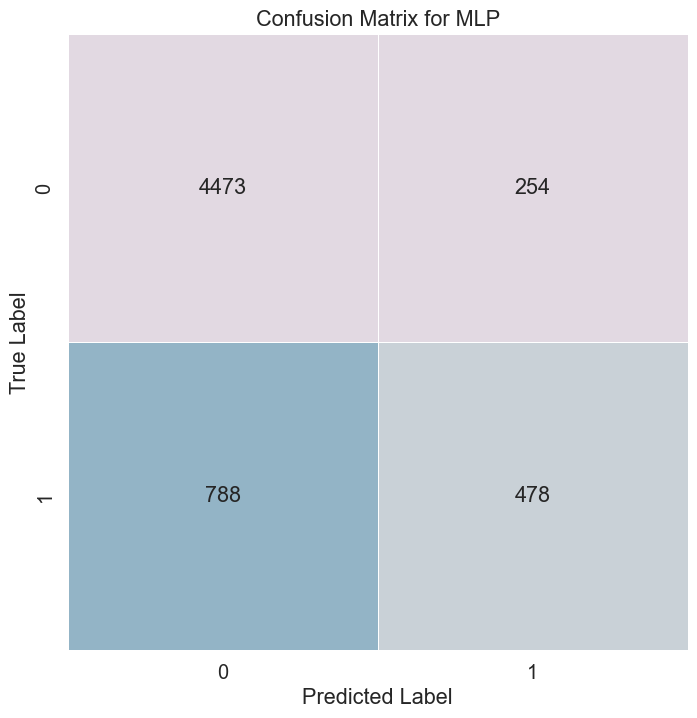

In [19]:
# Plot confusion matrix for Multi-layer Perceptron.
matrix = confusion_matrix(y_test,mlp_pred)
sns.set(font_scale=1.3)
plt.subplots(figsize=(8, 8))
sns.heatmap(matrix,annot=True, cbar=False, cmap='twilight',linewidth=0.5,fmt="d")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix for MLP');

In [28]:
def create_model():
    # create model
    model = Sequential()
    model.add(Dense(10, input_shape=(23,), activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.add(
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [40]:
seed = 7777
tf.random.set_seed(seed)
# create model
model = KerasClassifier(model=create_model, verbose=0)

# define the grid search parameters
batch_size = [40, 50, 60, 80, 100, 150, 200]
epochs = [10, 25, 30, 50]
param_grid = dict(batch_size=batch_size, epochs=epochs)

# Hyperparameters to be checked.
parameters = {'activation':['logistic','relu'],
              'solver': ['lbfgs','adam','sgd'],
              'alpha':10.0 ** -np.arange(1,3),
              'hidden_layer_sizes':[(23),(12,5),(12,5,2),(3,1),(5)],
              'batch_size': batch_size, 'epochs': epochs}

In [43]:
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=1, cv=3)
grid_result = grid.fit(X, y)

In [44]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.787553 using {'batch_size': 50, 'epochs': 50}
0.716267 (0.081381) with: {'batch_size': 40, 'epochs': 10}
0.781078 (0.005540) with: {'batch_size': 40, 'epochs': 25}
0.786251 (0.007571) with: {'batch_size': 40, 'epochs': 30}
0.749310 (0.048077) with: {'batch_size': 40, 'epochs': 50}
0.729116 (0.065730) with: {'batch_size': 50, 'epochs': 10}
0.781078 (0.007171) with: {'batch_size': 50, 'epochs': 25}
0.780611 (0.002016) with: {'batch_size': 50, 'epochs': 30}
0.787553 (0.009083) with: {'batch_size': 50, 'epochs': 50}
0.666045 (0.062587) with: {'batch_size': 60, 'epochs': 10}
0.723142 (0.075600) with: {'batch_size': 60, 'epochs': 25}
0.711301 (0.094728) with: {'batch_size': 60, 'epochs': 30}
0.690971 (0.096507) with: {'batch_size': 60, 'epochs': 50}
0.656963 (0.067811) with: {'batch_size': 80, 'epochs': 10}
0.754815 (0.029984) with: {'batch_size': 80, 'epochs': 25}
0.693139 (0.119933) with: {'batch_size': 80, 'epochs': 30}
0.699786 (0.065845) with: {'batch_size': 80, 'epochs': 50}
0.